___


___
# Logistic Regression Project 





In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Inspect the Data


In [60]:
# Load data
ad_data = pd.read_csv('advertising.csv')

In [61]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [62]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [63]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [64]:
# Check for missing values in the entire DataFrame
missing_values = ad_data.isnull().sum()
print(missing_values)

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


## Exploratory Data Analysis


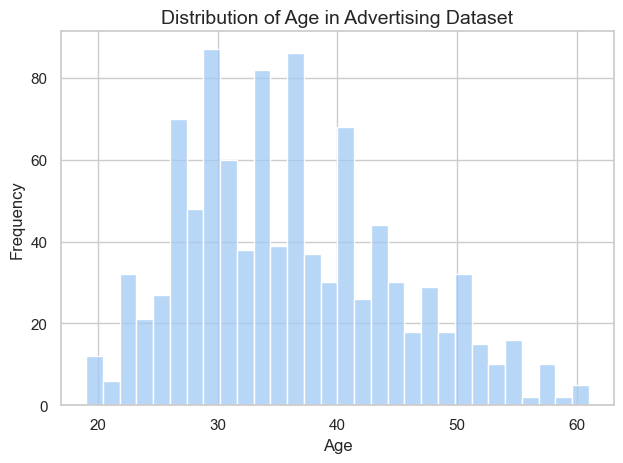

In [65]:
# Set style and color palette 
sns.set_theme(style='whitegrid', palette='pastel')

# Create a histogram to visualize the distribution of ages in the advertising dataset
sns.histplot(data=ad_data, x='Age', bins=30)

# Customize plot elements
plt.title('Distribution of Age in Advertising Dataset', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')

# Adjust layout to prevent overlap of title with plot
plt.tight_layout()

# Display the plot
plt.show()


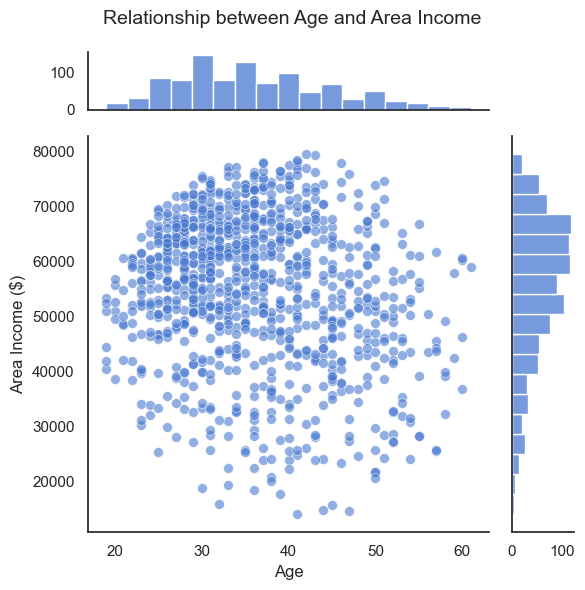

In [66]:
# Set style and color palette 
sns.set_theme(style='white', palette='muted')

# Create a joint plot to visualize the relationship between Age and Area Income
joint = sns.jointplot(data=ad_data, x='Age', y='Area Income', kind='scatter',
                      marginal_ticks=True, marker='o', s=50, alpha=0.6)

# Customize plot elements
joint.figure.suptitle('Relationship between Age and Area Income', fontsize=14)
joint.ax_joint.set_xlabel('Age')
joint.ax_joint.set_ylabel('Area Income ($)')

# Adjust layout to prevent overlap of title with plot
plt.tight_layout()

# Display the plot
plt.show()

In [67]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

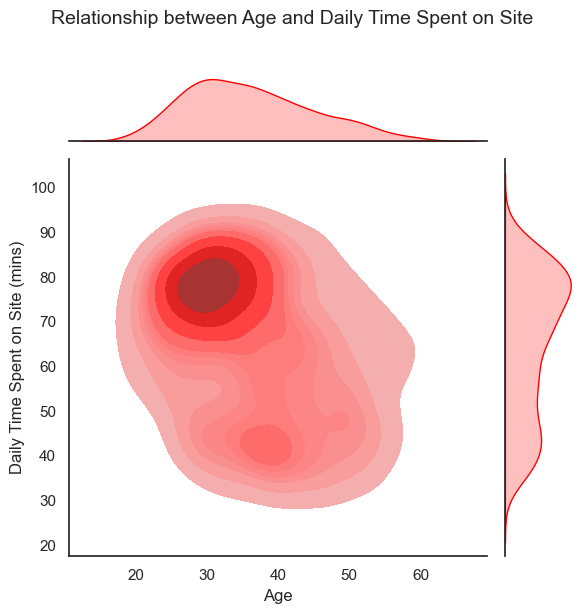

In [68]:
# Create a joint plot to visualize the relationship between Age and Daily Time Spent on Site
joint = sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', kind='kde',
                      color='red', fill=True)

# Customize plot elements
joint.figure.suptitle('Relationship between Age and Daily Time Spent on Site', fontsize=14, y=1.02)  # Adjust title position
joint.ax_joint.set_xlabel('Age', fontsize=12)
joint.ax_joint.set_ylabel('Daily Time Spent on Site (mins)', fontsize=12)

# Adjust layout to prevent overlap of title with plot
plt.tight_layout()

# Display the plot
plt.show()

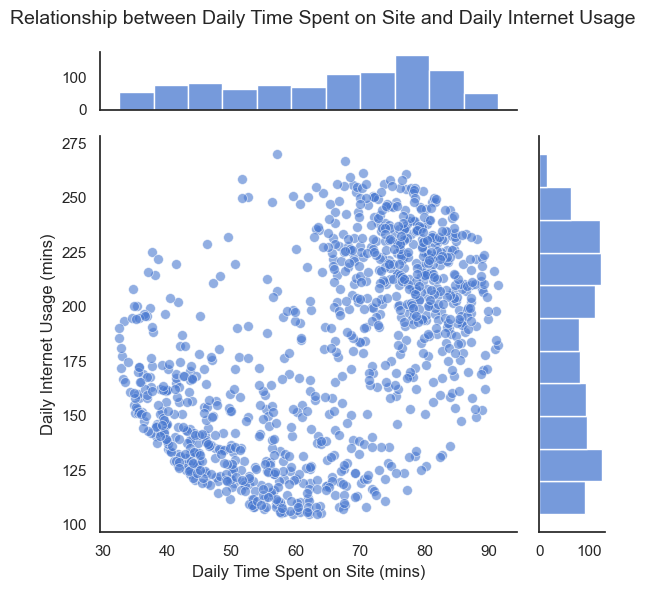

In [69]:
# Create a joint plot to visualize the relationship between Age and Area Income
joint = sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage',
                      marginal_ticks=True, marker='o', s=50, alpha=0.6)

# Customize plot elements
joint.figure.suptitle('Relationship between Daily Time Spent on Site and Daily Internet Usage', fontsize=14)
joint.ax_joint.set_xlabel('Daily Time Spent on Site (mins)')
joint.ax_joint.set_ylabel('Daily Internet Usage (mins)')

# Adjust layout to prevent overlap of title with plot
plt.tight_layout()

# Display the plot
plt.show()

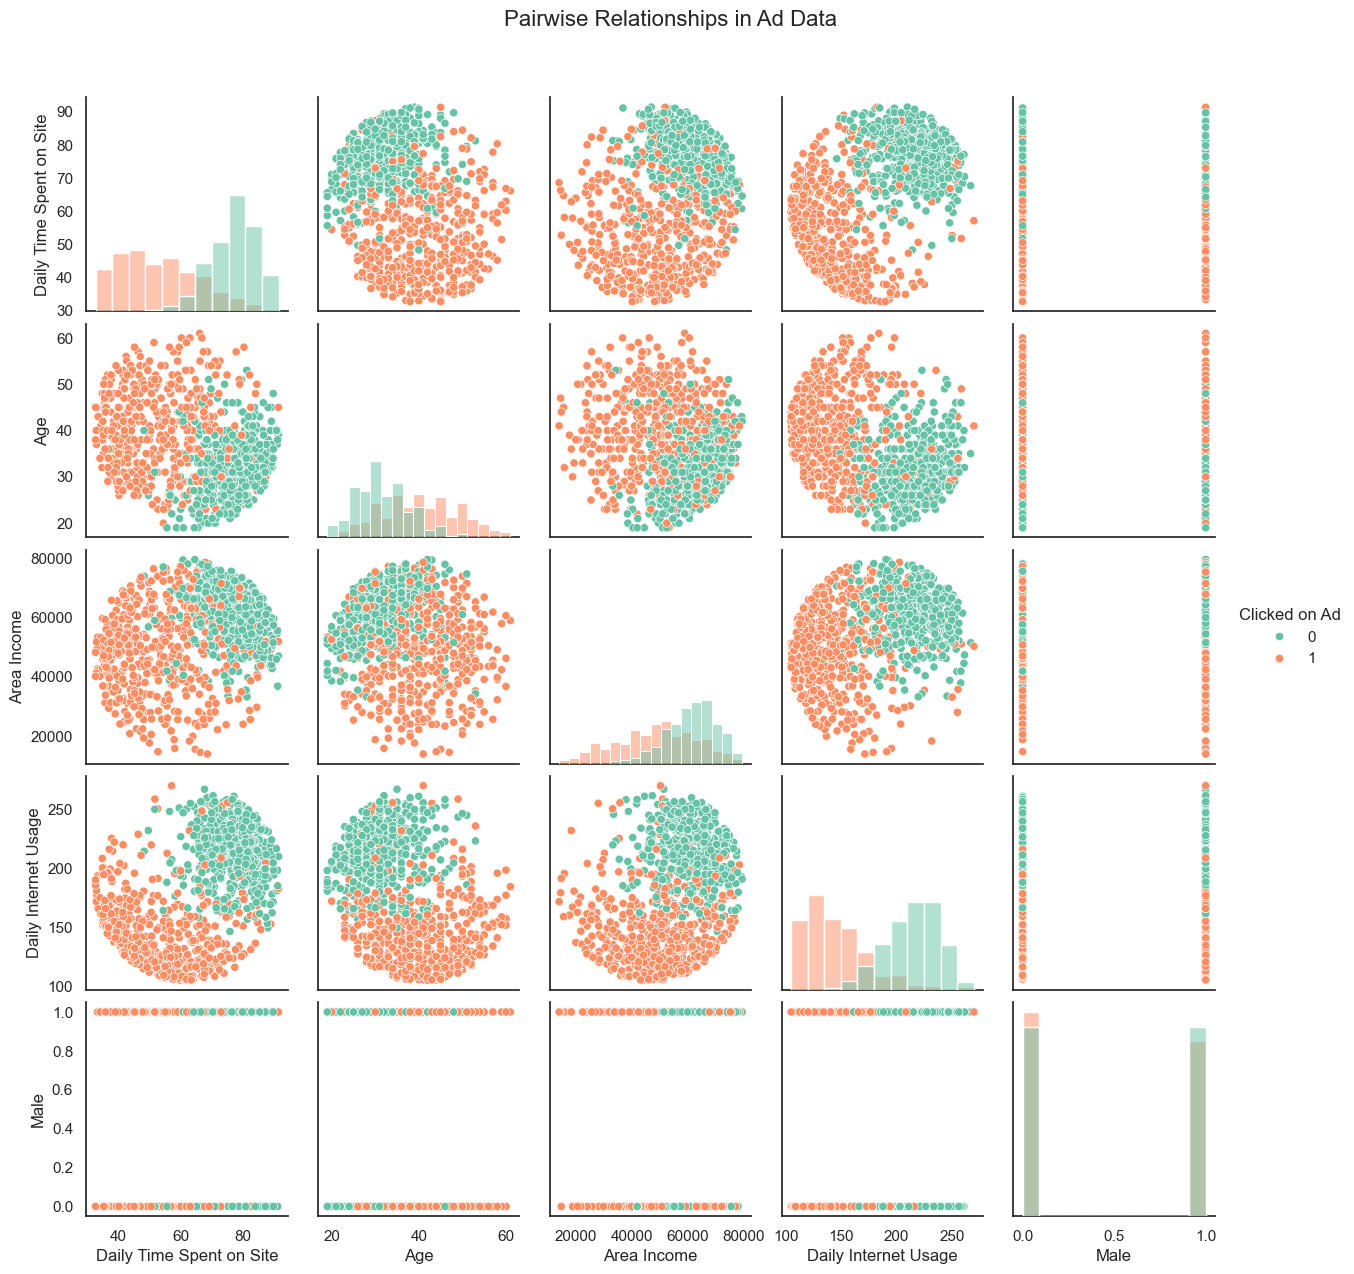

In [70]:
# Create a pair plot to visualize relationships in ad_data, colored by 'Clicked on Ad'
pairplot = sns.pairplot(data=ad_data, hue='Clicked on Ad', diag_kind='hist', palette='Set2')

# Customize plot 
pairplot.figure.suptitle('Pairwise Relationships in Ad Data', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.95)  # Adjust the space for the title

# Display the plot
plt.show()

# Logistic Regression



In [71]:
# Extract the target variable
y = ad_data['Clicked on Ad']
# Extract significant features to predict the target variable
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [72]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [73]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logm = LogisticRegression(solver='lbfgs', max_iter=200)

In [75]:
# Fit the model on the training data
logm.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Predictions and Evaluations


In [76]:
# Predict labels
y_pred = logm.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report to evaluate model performance
print(classification_report(y_true=y_test, y_pred=y_pred))

# Print confusion matrix to further analyze model predictions
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[155   2]
 [  5 138]]


In [78]:
# Computing class proportions
class_proportions = ad_data['Clicked on Ad'].value_counts(normalize=True)
print("Class Proportions:")
print(class_proportions)

Class Proportions:
Clicked on Ad
0    0.5
1    0.5
Name: proportion, dtype: float64


## Conclusion

The logistic regression model demonstrates strong predictive capabilities for ad clicks, evidenced by its high F1 score and accuracy. This accuracy (98%) reflects robust performance across both user types due to the dataset's balanced classes. Additionally, the F1 score of 98% indicates excellent precision and recall, underscoring the model's ability to accurately identify users who engage with ads.

Moreover, the confusion matrix reinforces the model's accuracy with minimal misclassifications: only 2 false positives and 5 false negatives. These low error rates validate the model's reliability in distinguishing between users who click on ads and those who do not.

Overall, these strong performance metrics highlight the model's effectiveness and generalizability in predicting ad engagement, making it valuable for improving advertising strategies.